In [2]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow for neural network modeling
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Define paths to your dataset
base_dir = './flower_photos'
train_dir = base_dir

In [6]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

In [8]:
# image size
img_size = (150, 150)

In [9]:
# Build the CNN model
# Create and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [7]:
# Set parameters
learning_rate = 0.001
batch_size = 32
epochs = 20

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2939 images belonging to 5 classes.


In [10]:
# Flow validation images in batches using train_datagen
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


91/91 [==============================] - 73s 778ms/step - loss: 1.4911 - accuracy: 0.3746 - val_loss: 1.2014 - val_accuracy: 0.5170
Epoch 2/20
91/91 [==============================] - 70s 770ms/step - loss: 1.0885 - accuracy: 0.5631 - val_loss: 1.0668 - val_accuracy: 0.5824
Epoch 3/20
91/91 [==============================] - 69s 753ms/step - loss: 0.9746 - accuracy: 0.6233 - val_loss: 1.1179 - val_accuracy: 0.5668
Epoch 4/20
91/91 [==============================] - 71s 784ms/step - loss: 0.9174 - accuracy: 0.6391 - val_loss: 0.9626 - val_accuracy: 0.6264
Epoch 5/20
91/91 [==============================] - 88s 972ms/step - loss: 0.8413 - accuracy: 0.6787 - val_loss: 0.8978 - val_accuracy: 0.6477
Epoch 6/20
91/91 [==============================] - 99s 1s/step - loss: 0.7778 - accuracy: 0.6983 - val_loss: 0.8869 - val_accuracy: 0.6648
Epoch 7/20
91/91 [==============================] - 80s 884ms/step - loss: 0.7590 - accuracy: 0.7152 - val_loss: 0.8756 - val_accuracy: 0.6690


In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Display the learning rate and batch size
print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, Epochs: {epochs}, Test Accuracy: {test_acc}')

22/22 [==============================] - 11s 476ms/step - loss: 0.9283 - accuracy: 0.6960
Learning Rate: 0.001, Batch Size: 32, Epochs: 20, Test Accuracy: 0.6960227489471436


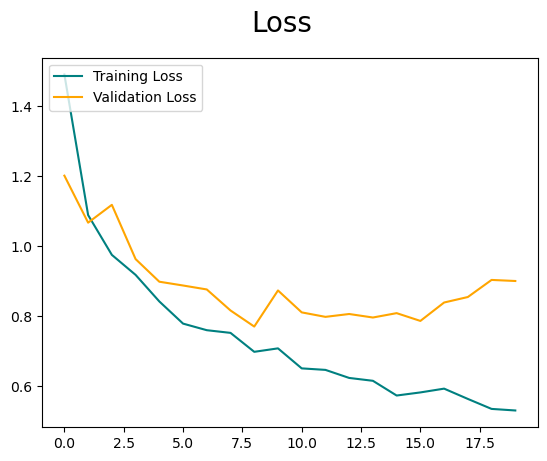

In [13]:
# Plot training loss
fig_loss = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
fig_loss.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

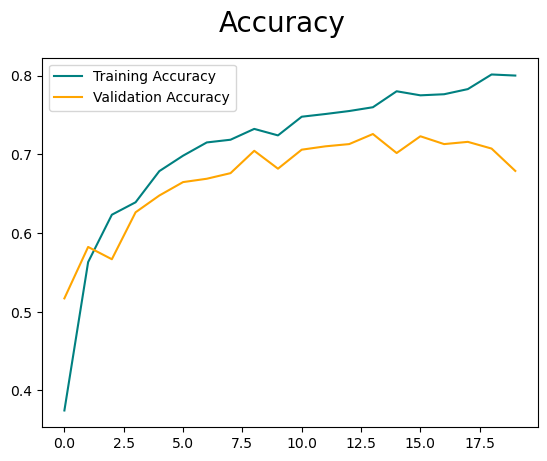

In [14]:
# Plot training accuracy
fig_acc = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
fig_acc.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### HYPERPARAMETER TUNNING

In [15]:
# Set hyperparameters for hyperparameter tuning
learning_rate = 0.001
batch_size = 16
epochs = 20

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2939 images belonging to 5 classes.


In [18]:
# Flow validation images in batches using train_datagen
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
183/183 [==============================] - 105s 543ms/step - loss: 0.5851 - accuracy: 0.7828 - val_loss: 0.8687 - val_accuracy: 0.7222
Epoch 2/20
183/183 [==============================] - 93s 495ms/step - loss: 0.5531 - accuracy: 0.7882 - val_loss: 0.7156 - val_accuracy: 0.7306
Epoch 3/20
183/183 [==============================] - 84s 461ms/step - loss: 0.5592 - accuracy: 0.7903 - val_loss: 0.9127 - val_accuracy: 0.7028
Epoch 4/20
183/183 [==============================] - 96s 525ms/step - loss: 0.5698 - accuracy: 0.7845 - val_loss: 0.7665 - val_accuracy: 0.7306
Epoch 5/20
183/183 [==============================] - 97s 522ms/step - loss: 0.5338 - accuracy: 0.7975 - val_loss: 0.8512 - val_accuracy: 0.7125
Epoch 6/20
183/183 [==============================] - 63s 346ms/step - loss: 0.5459 - accuracy: 0.7917 - val_loss: 0.7846 - val_accuracy: 0.7264
Epoch 7/20
183/183 [==============================] - 93s 509ms/step - loss: 0.5327 - accuracy: 0.7961 - val_loss: 0.7752 - val_a

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, Epochs: {epochs}, Test Accuracy: {test_acc}')

45/45 [==============================] - 8s 170ms/step - loss: 0.8857 - accuracy: 0.7514
Learning Rate: 0.001, Batch Size: 16, Epochs: 20, Test Accuracy: 0.7513889074325562


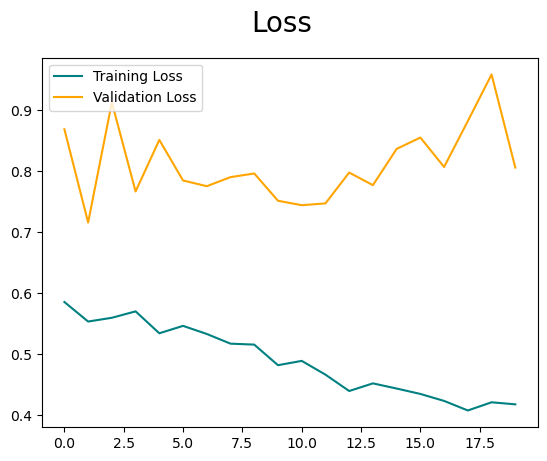

In [21]:
# Plot training loss
fig_loss = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
fig_loss.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

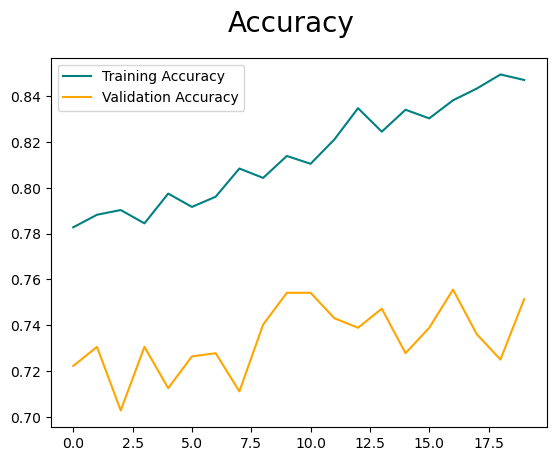

In [22]:
# Plot training accuracy
fig_acc = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
fig_acc.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [10]:
# Set hyperparameters for hyperparameter tuning
learning_rate = 0.0001
batch_size = 32
epochs = 20

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2939 images belonging to 5 classes.


In [13]:
# Flow validation images in batches using train_datagen
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


91/91 [==============================] - 65s 679ms/step - loss: 1.3502 - accuracy: 0.4200 - val_loss: 1.1928 - val_accuracy: 0.4943
Epoch 2/20
91/91 [==============================] - 83s 879ms/step - loss: 1.1405 - accuracy: 0.5208 - val_loss: 1.1779 - val_accuracy: 0.4986
Epoch 3/20
91/91 [==============================] - 75s 799ms/step - loss: 1.0637 - accuracy: 0.5679 - val_loss: 1.0766 - val_accuracy: 0.6009
Epoch 4/20
91/91 [==============================] - 62s 649ms/step - loss: 1.0258 - accuracy: 0.5951 - val_loss: 1.1152 - val_accuracy: 0.5952
Epoch 5/20
91/91 [==============================] - 57s 600ms/step - loss: 0.9850 - accuracy: 0.6209 - val_loss: 1.0323 - val_accuracy: 0.6037
Epoch 6/20
91/91 [==============================] - 67s 711ms/step - loss: 0.9478 - accuracy: 0.6354 - val_loss: 1.0003 - val_accuracy: 0.6463
Epoch 7/20
91/91 [==============================] - 74s 784ms/step - loss: 0.9078 - accuracy: 0.6570 - val_loss: 0.9997 - val_accuracy: 0.64

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, Epochs: {epochs}, Test Accuracy: {test_acc}')

22/22 [==============================] - 11s 333ms/step - loss: 0.8122 - accuracy: 0.7045
Learning Rate: 0.0001, Batch Size: 32, Epochs: 20, Test Accuracy: 0.7045454382896423


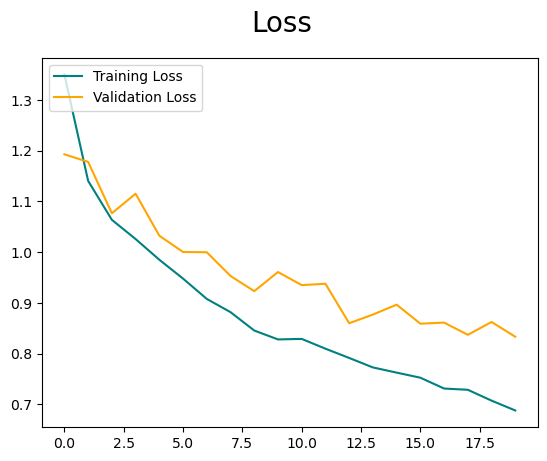

In [16]:
# Plot training loss
fig_loss = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
fig_loss.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

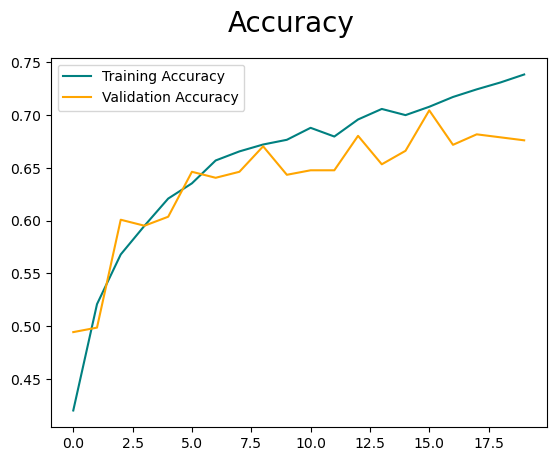

In [17]:
# Plot training accuracy
fig_acc = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
fig_acc.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()